# Unit 02: Computing with Data in Python

# Outline of ECE 3

The course ECE 3 is organized into 4 units.

- Unit 01: Welcome to Python
- **Unit 02: Computing with Data in Python**
- Unit 03: Summarizing Data in Python
- Unit 04: Predicting from Data with Machine Learning in Python

# Outline of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix 
      - Opening data: Python I/O
      - Matrix transpose, addition, subtraction
      - Matrix-vector multiplication
      - Column space, row space, image space, null space, rank
      - Matrix-matrix multiplication
      - Matrix inverse
      - Singular Value Decomposition

# 1. What is a Vector


A vector is roughly "a list of numbers": 

<!-- $\rightarrow$ everywhere in modern data and computer programs.
 -->
$\rightarrow$ a vector is how we represent data in a computer!


## Lets go through some examples:

### Tabular

Tabular data is structured information organized in rows (observations) and columns (features). We can consider each row as a vector of features or each column as a vector of observations.

<center><img src="figs/01_tabular.jpg" alt="default" width=800px/></center>

**Example:** The *Iris dataset*, collected by botanist Edgar Anderson in the 1930s, is a famous dataset in machine learning and statistics. It contains measurements of sepal and petal dimensions of three iris flower species

In [3]:
import numpy as np
from tabulate import tabulate

# Load the CSV file using NumPy
data = np.genfromtxt('../data/iris.csv', delimiter=',', dtype=str)

# Print the data in a nice tabular format
headers = data[0]  # Assuming the first row contains headers
data = data[1:]     # Exclude the header row from data

# Print the table
print(tabulate(data, headers, tablefmt="pretty"))

+----------------+---------------+----------------+---------------+--------------+
| "sepal.length" | "sepal.width" | "petal.length" | "petal.width" |  "variety"   |
+----------------+---------------+----------------+---------------+--------------+
|      5.1       |      3.5      |      1.4       |      .2       |   "Setosa"   |
|      4.9       |       3       |      1.4       |      .2       |   "Setosa"   |
|      4.7       |      3.2      |      1.3       |      .2       |   "Setosa"   |
|      4.6       |      3.1      |      1.5       |      .2       |   "Setosa"   |
|       5        |      3.6      |      1.4       |      .2       |   "Setosa"   |
|      5.4       |      3.9      |      1.7       |      .4       |   "Setosa"   |
|      4.6       |      3.4      |      1.4       |      .3       |   "Setosa"   |
|       5        |      3.4      |      1.5       |      .2       |   "Setosa"   |
|      4.4       |      2.9      |      1.4       |      .2       |   "Setosa"   |
|   

### Images

Image data consists of visual information represented as pixels in a grid. By flattening this grid we can consider each image as a vector of zeros and ones.

<center><img src="figs/00_image_a.jpg" alt="default" width=1000px/></center>

**Example:** *MNIST* is a widely-used dataset consisting of 28x28 pixel handwritten digits (0-9) created in the late 1990s by Yann LeCun and his colleagues, serving as a benchmark for evaluating image classification algorithms, particularly in the early days of deep learning.

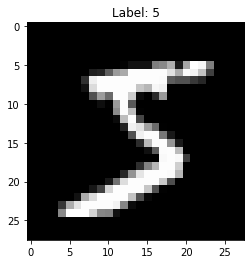

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('../data/', train=True, transform=transform, download=True)

# Get the image data and its label
image_index = 0  # Change this to select a different image
image, label = train_dataset[image_index]

# Display the image
plt.figure()
plt.imshow(image[0], cmap='gray')  # MNIST images are single-channel (grayscale)
plt.title(f"Label: {label}")
plt.show()
print(image)

### Color

In a computer color is represented by three numbers, one for red, green and blue. Thus, each color is a vector in RGB space.

<center><img src="figs/01_rgb_intro.png" alt="default" width=600px/></center>

**Example:** Let's visualize a color as a point in RGB space.

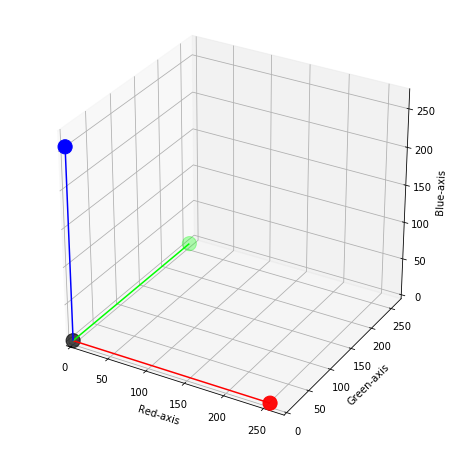

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Define RGB values for different colors
colors = np.array([[255, 0, 0],  # Red
                   [0, 255, 0],  # Green
                   [0, 0, 255]])  # Blue

new_color = np.array([[0, 0, 0]])
colors = np.vstack((colors, new_color))

# Show the 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(colors[:,0], colors[:,1], colors[:,2], s=200, color=colors/255)
ax.quiver(0, 0, 0, colors[:,0], colors[:,1], colors[:,2], color=colors/255, arrow_length_ratio=0)
ax.set_xlim(0, 270); ax.set_ylim(0, 270); ax.set_zlim(0, 270)
ax.set_xlabel("Red-axis"); ax.set_ylabel("Green-axis"); ax.set_zlabel("Blue-axis")
plt.show()

### Other

**Temporal:** Temporal data such as stock prices or covid rates can be represented as a vector of values for equally spaced time intervals.
<center><img src="figs/01_signal_vector.png" alt="default" width=300px/></center>

**Audio:** Audio data repersents sound, typically in the form of a waveform, by various audio properties like amplitude, frequency, and time.
<center><img src="figs/01_audio.png" alt="default" width=300px/></center>

**Text:** A document can be represented as a vector of unique word frequencies. This is called a bag-of-words representation.
<center><img src="figs/01_text.png" alt="default" width=300px/></center>

## Computer science definition of a vector


$\color{#EF5645}{\text{Definition}}$ A _vector_ is an ordered list of numbers:


<center><img src="figs/01_def_vector.png" alt="default" width=500px/></center>

<!-- 
$$\begin{bmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{bmatrix} \text{ or } \begin{bmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{bmatrix} \text{ or } (-1.1, 0.0, 3.6, -7.2).$$  -->

The numbers in the list are called: _components, elements, entries, or coefficients_ of the vector.

The number of elements in the list is the _size, dimension, or length_ of the vector. 

If the a vector has dimension $n$, we call it an _$n$-vector_. If a vector has dimension $1$, we call it a _scalar_.

$\color{#EF5645}{\text{Notation}}$: 

We use symbols to denote vectors: $a, \vec{a}$.

The ith element of vector $a$ is written $a_i$.

$\color{#EF5645}{\text{Remark}}$: Remeber, for an n-vector:
  - 😱 in Math: indexes run from $i = 1$ to $i = n$,
  - 😱 in Python: indexes run from $i = 0$ to $i = n - 1$.

## Vectors in Python

$\color{#003660}{\text{In Python}}$, vectors could be represented as
- a "list" of numbers, using `[]`,
- a "tuple" of numbers, using `()`,
- an "array" of numbers, using `np.array()`.

We will always use the `numpy` package to represent vectors because it has multiple functions to easily compute with vectors!

We import a package with `import` functionality.  We rename the package using `as` functionality.

In [66]:
import numpy as np

a = [1, 2, 3]
b = (4, 5, 6)

c = np.array(a)
d = np.array(b)

print(c)
print(d)

[1 2 3]
[4 5 6]


### Accessing vector components

In `numpy`, we "access" the components of a vector just as we do with a list or tuple:

In [45]:
a = np.array([3, 4, 5])
a[0]

3

### Assigning vector components

In `numpy`, components of a vector can be "assigned", as in a list:

In [54]:
a = np.array([1, 2.2, -3., 4.])
a[3] = -2022
a

array([ 1.000e+00,  2.200e+00, -3.000e+00, -2.022e+03])

### Computing vector length

The size/length/dimension of a vector is computed with `len` or `np.size`, (for lists, tuples, and np.arrays)

In [65]:
a = [1, 2, 3]
b = (4, 5, 6)

c = np.array(a)

print(len(a))
print(np.size(c))

3
3


## Speicial Vectors

### Zero Vector

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 0 is denoted $0_n$ or $\vec{0}$ or just $0$ and is called a _zero vector_. 

### Ones Vector

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 1 is denoted $1_n$ or $\vec{1}$ or just 1 and is called a _ones-vector_.

### One-Hot Vectors

$\color{#EF5645}{\text{Definition}}$: A _one-hot vector_ or _standard unit vector_ is a vector which has one entry 1 and all others 0. If $i$ is the index of the non-zero entry, we denote it $e_i$.

$\color{#003660}{\text{In Python}}$, we use `zeros` and `ones` (from `numpy`) to build these vectors.

In [78]:
zero2 = np.zeros(2)
print(zero2)

ones4 = np.ones(4)
print(ones4)

e1 = np.zeros(3)
e1[0] = 1
print(e1)

[0. 0.]
[1. 1. 1. 1.]
[1. 0. 0.]


$\color{#047C91}{\text{Exercise}}$: What are all the one-hot vectors of length 3?

In [80]:
"""Create all one-hot vector of len 3."""

e = np.zeros(3)



## Visualization of vectors

The `matplotlib.pyplot` package contains tools to visualize vectors.

In [3]:
import matplotlib.pyplot as plt

### Visualization: A vector as a point

- A 2-vector $(a_1, a_2)$ can represent:
  - a point on the 2D plane, coordinates: $(a_1, a_2)$. 
 
- An n-vector $(a_1, ..., a_n)$ can represent:
  - a point in the n-D space.

$\color{#003660}{\text{In Python}}$, we use `scatter` to plot points in 2D, thanks to `matplotlib.pyplot`.

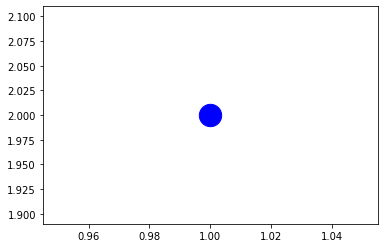

In [8]:
vector = [1, 2]
plt.scatter(vector[0], vector[1], s=500, color="blue");

$\color{#003660}{\text{In Python}}$, we use `scatter3D` to plot points in 3D, from `matplotlib.pyplot`.

We also need to tell python that we are going to 3D.

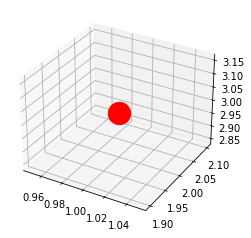

In [13]:
vector = [1, 2, 3]
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(vector[0], vector[1], vector[2], s=500, color="red");

# 2. Operations on Vectors

## Vector Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two vectors a and b can be added/subtracted:
- Addition is denoted a + b; subtraction is denoted a - b.
- Addition/subtraction is computed by adding/subtracting vector elements.

$\color{#047C91}{\text{Exercise}}$: Compute:
<center><img src="figs/01_add.png" alt="default" width=160px/></center>

In [82]:
a = np.array([0, 7, 3])
b = + np.array([1, 2, 0])
c = a + b
print(c)

# If we use lists, it does not give the expected result
a = [0, 7, 3]
b = [1, 2, 0]
c = a + b
print(c)

[1 9 3]
[0, 7, 3, 1, 2, 0]


$\color{#047C91}{\text{Exercise}}$: Given a vector $a = [1,4,9,20]$ compute $a + 0$

In [86]:
a = np.array([1, 4, 9, 20])
b = np.zeros(np.size(a))
c = a + b
print(c)

[ 1.  4.  9. 20.]


### Properties of Vector Addition

$\color{#6D7D33}{\text{Properties}}$: For any two vectors $a, b$:
- commutativity: a + b = b + a
- associativity: (a + b) + c = a + (b + c) = a + b + c
- additive identity: $a + 0 = a$
- additive inverse: $a - a = 0$

### Interpretation: Adding displacement vectors

If vectors a and b are displacements: 
- a + b is the sum displacement

<center><img src="figs/01_sumvectors.jpg" alt="Drawing" width=450px /></center>

### Interpretation: Displacement from a point to another

If vectors p and q are points:
- p − q is the displacement from q to p


<center><img src="figs/01_subpoints.jpg" width=450px alt="default"/></center>

## Scalar-vector multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n$-vector a can be multiplied to give a new vector: 
$$βa = ( βa_1, . . . , β a_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute:

<center><img src="figs/01_scalar.png" alt="default" width=160px/></center>




In [88]:
a = np.array([1, 9, 6])
beta = -2
print(beta * a)

# Using lists does not give the expected result
l = [1, 9, 6]
print(2 * l)

[ -2 -18 -12]
[1, 9, 6, 1, 9, 6]


### Properties of scalar-vector multiplication

$\color{#6D7D33}{\text{Properties}}$: For scalars  $\beta, \gamma$ and $n$-vectors $a, b$: 
- associativity: $( βγ)a = β(γa)$
- multiplicative identity: $1(a) = a$
- left distributivity: $( \beta + \gamma)a = \beta a + \gamma a$
- right distributivity: $β(a + b) = βa + βb$

$\color{#047C91}{\text{Exercise}}$: Compute the _average_ of two vectors $a$ and $b$?

In [35]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2])
b = np.array([1,4,-3])
average = (a + b) / 2
print(average)

[ 1.   2.  -0.5]


## Elementwise-multiplication (Hadamard Product)

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ amd $b$ can be multiplied to give a new vector: 
$$a \odot b = ( a_1b_1, . . . , a_nb_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute the hadamard product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

In [69]:
"""Compute the hadamard product of two vectors."""
a = np.array([1,0,2])
b = np.array([-1,1,2])

print(a * b)
print(np.multiply(a, b))

[-1  0  4]
[-1  0  4]


## Inner Product

$\color{#EF5645}{\text{Definition}}$: The inner product (or dot product) of n-vectors a and b is the scalar:
$$a^T b = a_1b_1 + a_2b_2 + · · · + a_nb_n.$$
- Other notations: $〈a, b〉, 〈a|b〉, (a, b), a · b.$
- $\color{#003660}{\text{In Python}}$, we use `inner` or `dot` (from `numpy`).

$\color{#047C91}{\text{Exercise}}$: Compute the inner product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

In [97]:
"""Compute the inner product of two vectors."""
a = np.array([1,0,2])
b = np.array([-1,1,2])

print(np.inner(a, b))
print(np.dot(a,b))

3
3


$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and the zero vector?

$$a^T \vec{0} = $$

In [28]:
"""Compute the inner product between a vector and zero vector."""
a = np.array([1,0,2])
b = np.zeros(3)
np.inner(a, b)

0.0

$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and the ones vector?

$$a^T \vec{1} = $$

In [71]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2])
b = np.ones(3)
print(np.inner(a, b))
print(np.sum(a))

3.0
3


$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and a one-hot vector?

$$a^T \vec{e_i} = $$

In [99]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2])
e1 = np.zeros(3)
e1[0] = 1
np.inner(a, e1)

1.0

### Properties of inner product

$\color{#6D7D33}{\text{Properties}}$: For $n$-vectors $a, b, c$ and scalars $\gamma$:
- $a^T b = b^T a$
- $(γa)^T b = γ(a^T b)$
- $(a + b)^T c = a^T c + b^T c$

$\color{#047C91}{\text{Exercise}}$: Write a function that computes the output of the following polynomial using the inner product function:

$$f(x) = 0.1x^5 + 0.8 x^4 - 1.3 x^3 + 1.1 x^2 - 3 x + 5$$

In [68]:
def polynomial(x):
    pass

print(polynomial(1))

None


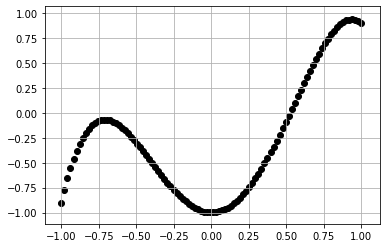

In [110]:
beta = np.array([-1,0,4,0.9,-3])
degree = np.size(beta)

def vander(x, degree):
    return np.array([x**p for p in range(degree)])

plt.figure()
xrange = np.linspace(-1,1,100)
for xi in xrange:
    X = vander(xi, 5)
    plt.scatter(xi, np.dot(beta, X), c='k')
plt.grid()
plt.show()

## Norm

$\color{#EF5645}{\text{Definition}}$: The *Euclidean norm*, or just *norm*, of an $n$-vector $x$ is:
$$||x|| = \sqrt{x_1^2 + ... + x_n^2}.$$ 

<!-- = \sqrt{x^Tx} -->

$\color{#EF5645}{\text{Remark}}$: The norm is equal to the absolute value for $n=1$.

$\color{#003660}{\text{In Python}}$, the module `linalg` from the package `numpy` has a function called `norm`.

In [2]:
x = np.array([2, -1, 2])

print(np.linalg.norm(x))

3.0


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the norm using the vector operators we have already seen?.

In [102]:
def norm(a):
    pass

x = np.array([2, -1, 2])
print(norm(x))
print(np.linalg.norm(x))

None
3.0


### Properties of the Norm

$\color{#6D7D33}{\text{Properties}}$: For any scalar $\beta$ and any $n$-vectors $x, y$:
1. Homogeneity: $||\beta x|| = |\beta|||x||$
2. Triangle inequality: $||x+y|| \leq ||x|| + ||y||$
3. Nonnegative: $||x|| \geq 0$
4. Definite: $||x|| = 0$ if and only if $x = 0$

### Triangle Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $x$ and $y$, we have the triangle inequality:
$$\|x + y\| \leq \|x\| + \|y\|.$$

$\color{#047C91}{\text{Exercise}}$: Can you prove this inequality using geometrically? 

*hint:* Think about this in 2D.

Notice that given two n-vectors $x$ and $y$ we can make a 2D triangle by connecting these points with the origin and themselves.

<center><img src="figs/01_triangle_inequality.png" alt="Drawing" width=350px/></center>

## Distance

$\color{#EF5645}{\text{Definition}}$: The *Euclidean distance*, or just *distance*, between $n$-vectors $a$ and $b$ is:
$$dist(a, b) = ||a - b||.$$

$\color{#EF5645}{\text{Remark}}$: This definition agrees with ordinary distance for $n = 1, 2, 3.$

## Angle

$\color{#EF5645}{\text{Definition}}$: The _angle_ between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos\left( \frac{a^Tb}{||a||||b||} \right).$$

$\color{#EF5645}{\text{Remark}}$: It coincides with the ordinary angle in 2D and 3D.

In [93]:
import numpy as np
def angle(a, b):
    product = np.linalg.norm(a)* np.linalg.norm(b)
    fraction = np.inner(a, b) / (product)
    return np.arccos(fraction)

a = [1, 0, 0, 0, 0, 0]
b = [0, 1, 0, 0, 1, 0]

print(angle(a, b))
print(np.pi / 2)

1.5707963267948966
1.5707963267948966


Write: $\theta = \angle(a, b)$ 
- $θ = π/2 = 90^\circ$: a, b are *orthogonal*: $a ⊥ b$ ($a^T b = 0$) 
- $θ = 0$: a, b are _aligned_ ($a^T b = ‖a‖ ‖b‖$) 
- $θ = π = 180^\circ$: a, b are _anti-aligned_ ($a^T b = −‖a‖ ‖b‖$)
- $θ ≤ π/2 = 90^\circ$: a, b make an _acute angle_ ($a^T b ≥ 0$)
- $θ ≥ π/2 = 90^\circ$: a, b make an _obtuse angle_ ($a^T b ≤ 0$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>

$\color{#047C91}{\text{Exercise}}$: Can you prove why the angle between two vectors takes the form above?

*hint:* remeber the *law of cosines* $c = \sqrt{a^2 + b^2 - 2ab\cos(\gamma)}$

<center><img src="figs/01_law_of_cosines.png" alt="default"/></center>

Again, notice that given two n-vectors $\vec{a}$ and $\vec{b}$ we can make a 2D triangle by connecting these points with the origin and themselves.  Let $A = \vec{a}$, $B = \vec{b}$, and $C = 0$. Now we can apply the law of cosines.  

- $a = \|\vec{b}\|$
- $b = \|\vec{a}\|$
- $c = \|\vec{b} - \vec{a}\| = \sqrt{\|a\|^2 + \|b\|^2 + 2 a^\intercal b}$

Plugging into the expression for the law of cosines and rearannging we get
$$\cos(\gamma) = \frac{a^\intercal b}{\|a\|\|b\|}$$

### Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

$\color{#047C91}{\text{Exercise}}$: Can you prove this inequality using our definiton of the angle between two vectors? 

The angle $\angle(a, b)$ is the number in $[0, \pi]$ that satisfies: 
$$a^Tb = ||a||||b||\cos(\angle(a, b)).$$
and $|\cos(\angle(a, b))| \le 1$.

## Recap:
- Definition of a vector and examples
- Special vectors (Zero, Ones, One-hot)
- Operations on vectors
    - Addition/Subtraction
    - Scalar-Vector multiplication
    - Elementwise Vetor multiplication
    - Inner product
    - Norm and Distance
    - Angle

# 3. Collections of Vectors

### Linear combinations

$\color{#EF5645}{\text{Definition}}$: For a list of $m$ n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$:

$$β_1a_1 + · · · + β_ma_m$$

is a linear combination of the vectors.
- $β_1, . . . , β_m$ are the coefficients.

$\color{#EF5645}{\text{Remark:}}$ Here, $a_i$ is the ith vector in the list of $m$ vectors. It is **not** a component of a vector, it is itself a vector.

$\color{#047C91}{\text{Exercise}}$: Write a $n$-vector $b = (b_1, ..., b_{n})$ as a linear combination of the one-hot n-vectors $e_1, ..., e_{n}$.

$\color{#003660}{\text{In Python}}$:

In [37]:
"""Write a linear combination of 2 vectors."""
a1 = np.array([1, 2, 3])
a2 = np.array([3, 6, 6])
linear_comb = 2.2 * a1 - 4.7 * a2
linear_comb

array([-11.9, -23.8, -21.6])

### Interpretation: Displacements and Linear Combination

Linear combination $b = 0.75a_1 + 1.5a_2$


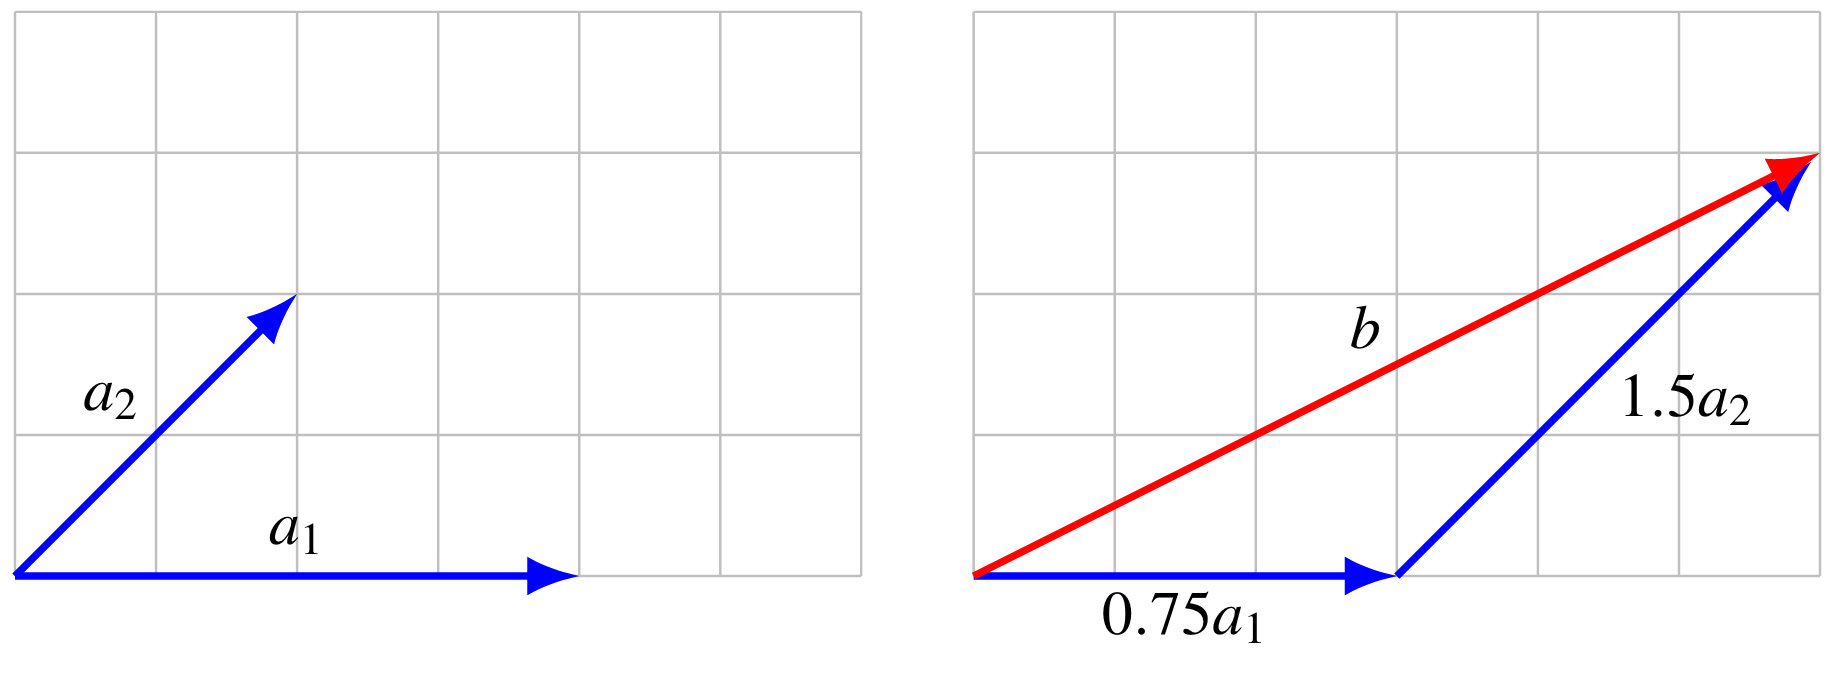

### Orthogonal, Normalized, Orthonormal

$\color{#EF5645}{\text{Definitions}}$: The $n$-vectors $a_1, . . . , a_k$ are:
- _(mutually) orthogonal_ if $a_i ⊥ a_j$ for all $i , j$
- _normalized_ if $‖a_i ‖ = 1$ for $i = 1, . . . , k$
- _orthonormal_ if they are orthogonal and normalized.

$\color{#047C91}{\text{Example}}$: Give examples of orthogonal, normalized and orthonormal vectors in 2D. Draw them.

$\color{#6D7D33}{\text{Properties}}$: If $a_1, ..., a_k$ are orthonormal, then:
- $a_i^Ta_j = 0$ if $i\neq j$ and $a_i^Ta_i = 1$,
- $k\leq n$,
- $a_1, ..., a_k$ are linearly independent.

##### Outline: 05 Linear Independence

- [Linear Dependence](#sec-linear)
- [Linear Independence](#sec-linear)
- [Basis](#Basis)
- [Orthonormality](#Orthonormal)
- **[Orthonormal Basis](#Orthonormal)**

### Orthonormal Basis

$\color{#EF5645}{\text{Definition}}$: A set of $n$ orthonormal $n$-vectors is called an _orthonormal basis_ of $\mathbb{R}^n$.

$\color{#047C91}{\text{Example}}$:
- Vectors $e_1, ...., e_n$ form an orthonormal basis of $\mathbb{R}^n$
- These $3$-vectors form an orthonormal basis of $\mathbb{R}^3$:
 

<center><img src="figs/05_linearindep.png" width=400px alt="default"/></center>



$\color{#047C91}{\text{Exercise}}$: Show that the $3$-vectors above form an orthonormal basis using math computations.

$\color{#047C91}{\text{Exercise}}$: Show that these form an orthonormal basis using Python: 
<!-- $$a_1 = \begin{pmatrix}
    0 \\
    0 \\
    -1 
\end{pmatrix}, \quad a_2 = \begin{pmatrix}
    1 / \sqrt{2} \\
    1 / \sqrt{2} \\
    0
\end{pmatrix} \quad a_3 = \begin{pmatrix}
    1 / \sqrt{2} \\
    -1 / \sqrt{2} \\
    0
\end{pmatrix}$$ -->
<center><img src="figs/05_linearindep.png" width=400px alt="default"/></center>


In [3]:
import numpy as np
a1 = np.array([0, 0, 1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

print(np.inner(a1, a2)) # Do same for a1, a3 and a2, a3
print(np.linalg.norm(a1)) # Do same for a2 and a3

0.0
1.0


### Orthonormal Expansion

$\color{#6D7D33}{\text{Property}}$: If $a_1, . . . , a_n$ is an orthonormal basis of $\mathbb{R}^n$, then:
- Any $n$-vector $x$ can be written:
$$x = (a^T_1 x)a_1 + · · · + (a^T_n x)a_n.$$

$\color{#EF5645}{\text{Definition}}$: The formula above is called _orthonormal expansion of $x$_ in the orthonormal basis. 

### Block or Stacked Vectors

$\color{#EF5645}{\text{Definition}}$: Suppose $a, b, c$ are vectors with sizes $m, n, p$. We can create a new vector $d$ as:

<center><img src="figs/01_stack.png" alt="default" width=150px/></center>

The vector $d$ is called:
- a _block vector or a stacked vector with entries $a, b, c$_, 
- or simply the concatenation of $a, b, c$.


$\color{#EF5645}{\text{Remark}}$: The stack vector $d$ has size $m+n+p$ with the following components:

$$d = (a_1, ..., a_m, b_1, ..., b_n, c_1, ..., c_p).$$

### Block or Stacked Vectors

$\color{#003660}{\text{In Python}}$, we create a block vector using `concatenate` (from `numpy`).

In [29]:
import numpy as np
a = np.array([1.1, 2.2])
b = np.array([3.3, 4.4, 5.5])
c = np.array([6.6, 7.7])
d = np.concatenate([a, b, c])
d

array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7])

<h1>Learn Python Pandas, Packages, and Modules</h1>


<b>Web Resources</b>
<br> <a href='https://docs.python.org/3/tutorial/modules.html#packages'>Docs.python.org - Packages</a>


#### <b>What are Python Modules?</b>

Modules are simply python files (.py) which contain python code. This code can define functions, classes, variables etc.


#### <b>Why do we use Modules?</b>

Modules allow us to organize our code by grouping related functionalities, which makes it easier to use and understand. Writing code into smaller, more manageable pieces will help you 1) debug easier, 2) create reusable code and 3) make the code more understandable to the end user.

#### <b>How do we use Modules?</b>

We can use the code in a module by using the <b>import</b> function. For example, let's say we created a .py file called 'Square.py'. Inside this file we defined a function called <b>calculateSquare</b>. 
```python
def calculateSquare(x):
    return x**2
```
We can use the <b>calculateSquare</b> function by using either of the following commands:

```python
import Square 
x = 2
print(Square.calculateSquare(x))

#Output: 4

from Square import calculateSquare
x = 2
print(calculateSquare(x))

#Output: 4

from Square import * #The asterisk imports all functions in the module [not always best practice]
x = 2
print(calculateSquare(x))

#Output: 4
```

#### <b>Where can I find more information on Modules?</b>

[Official python documentation on modules](https://docs.python.org/3.7/tutorial/modules.html)

<h1>Packages</h1>

#### <b>What are Python Packages?</b>

Python packages are an organized collection of related python modules in a single directory. 

#### <b>How do we use Packages?</b>

Packages are used exactly like modules (see the Modules section above).

#### <b>What are some common Packages?</b>

Below are some of the most widely used modules in finance and data science for data analysis:
- Pandas
- Numpy
- Scipy
- Scikit-Learn

Visualizations and dashboard creation:
- Matplotlib
- ipywidgets


In [8]:
###IMPORT PANDAS AND NUMPY PACKAGES###
import numpy as np

###CREATING A SERIES###
a = [1,2,3]
b = [1,2,3]
print(a + b)

[1, 2, 3, 1, 2, 3]


In [13]:
###CREATING A TIMESERIES BASED DATAFRAME###
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC'))
df

,A,B,C
2013-01-01,0.169424,0.166691,-2.385720
2013-01-02,0.542676,0.978059,1.152731
2013-01-03,-0.547186,0.918728,2.226278
2013-01-04,1.033752,-0.712600,1.169230
2013-01-05,-0.534291,0.985898,-1.705124
2013-01-06,0.485850,0.085890,1.870669


In [14]:
###GET DATA FOR A SINGLE COLUMN###
df['A']

2013-01-01    0.169424
2013-01-02    0.542676
2013-01-03   -0.547186
2013-01-04    1.033752
2013-01-05   -0.534291
2013-01-06    0.485850
Freq: D, Name: A, dtype: float64

In [15]:
###CALCULATE SUMMARY STATISTICS###
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.191704,0.403778,0.388011
std,0.631232,0.683725,1.941515
min,-0.547186,-0.712600,-2.385720
25%,-0.358362,0.106090,-0.990660
50%,0.327637,0.542709,1.160980
75%,0.528469,0.963226,1.695309
max,1.033752,0.985898,2.226278


In [16]:
###GET THE NUMBER OF ROWS AND COLUMNS###
df.shape

(6, 3)

In [17]:
###GET THE NUMBER OF ROWS ONLY###
len(df)

6

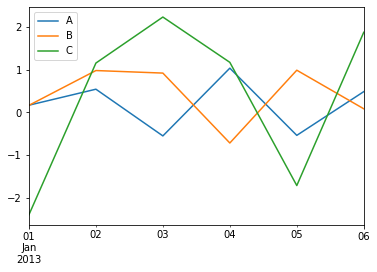

In [18]:
###PLOT THE DATAFRAME###
%matplotlib inline
df.plot()

# Learn Python File I/O


<b>Web Resources</b>
<br> <a href='https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files'>Docs.python.org - Reading and Writing Files</a>


#### <b>What is I/O?</b>

I/O, or input/output, is communication between a computer and the outside world.

Inputs are signals received by the computer. The computer can get inputs from hardware like a keyboard and mouse or from other computers via the internet. Outputs are signals sent by the computer. Your monitor is probably the most obvious output device. An internet modem is an example of a device that both receives inputs (web-pages loading on your browser) and sends outputs (outbound emails).

     
#### <b>Why do we use I/O?</b>

You can always define data directly in your python code:

```python
example_data = [1, 2, 3, 4, 5]
answer = function(example_data)
```


This is a great way to test functionality but isn't sustainable in the long term. It would be much easier if we could read in data from a file or API as well as write data down to files. This saves us having to manually define data and scales our solutions to handle arbitrary datasets.

## Files

Common file types you likely interact with are CSV and Excel files. The pandas library has a number of convenience functions for reading data from these files and converting them directly into dataframes.

```python
import pandas as pd

csv_dataframe = pd.read_csv('csv_file.csv')
excel_dataframe = pd.read_excel('excel_file.xlsx')
```

Each method accepts the path of the data file as an argument. File paths without a `/` indicate that the data file is in the same directory as the notebook we're writing our code in. If we want to read from a file inside a folder, then we'll need to update the file path, e.g. `folder/csv_file.csv`.

Both methods accept a number of different optional parameters for defining more precisely how you want them to read the data. Visit the [I/O section](https://pandas.pydata.org/docs/reference/io.html) of the online pandas documentation to learn more about these functions.

We can use the `%pwd` [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to find the local directory. Running the following code snippet in a project cell will print the path of your local directory:

```python
x = %pwd
print(x)
```

### Resources
Python has a rich library of packages and functions for dealing with files. [This online tutorial](https://www.programiz.com/python-programming/file-operation) explains in more detail how to use python to deal with File I/O (input and output).

### File IO Examples

1. You're writing some code inside `notebook.ipynb` and want to read the data from `bonds.csv` which is inside the `data` folder (see below). What file path do you need to specify to read the data into a dataframe: `pd.read_csv(...)`?

```
notebook.ipynb
data/
└── bonds.csv
```
`pd.read_csv('data/bonds.csv')`

2. You have a CSV with 3 blank rows at the top of the file. What parameter do you need to pass to the `read_csv` function to ignore these blank rows when reading in the data?

`skiprows=3`

3. A colleague has sent you some tabular data in a [JSON file](https://www.w3schools.com/js/js_json_intro.asp) that you've moved into the same folder as your notebook. You can use pandas to read this data into a dataframe:

`pd.read_json`

In [19]:
###RENAME COLUMNS###
df = df.rename(columns={"A":"X","B":"Y","C":"Z"})
df

,X,Y,Z
2013-01-01,0.169424,0.166691,-2.385720
2013-01-02,0.542676,0.978059,1.152731
2013-01-03,-0.547186,0.918728,2.226278
2013-01-04,1.033752,-0.712600,1.169230
2013-01-05,-0.534291,0.985898,-1.705124
2013-01-06,0.485850,0.085890,1.870669


In ECE, a 2-vector $a=(a_1, a_2)$ can represent a displacement in 2-D, for example the movement of a person on a map (google map, apple maps). 

<center><img src="figs/01_sumvectors.jpg" width=500px alt="default"/></center>

In ECE, a 3-vector $a$ can be a color in RGB: $a = (R, G, B)$

<center><img src="figs/01_matrix_color.jpeg" alt="default" width=600/></center>

<center>The matrix coloring is an operation on vectors</center>

### Visualization 2: A vector as an arrow

A 2-vector $(a_1, a_2)$ can also represent:
  - an arrow in the 2D plane from $(0, 0)$ to $(a_1, a_2)$.

An n-vector $(a_1, ..., a_n)$ can also represent:
  - an arrow in the n-D space from $(0, ..., 0)$ to $(a_1, ..., a_n)$.

$\color{#003660}{\text{In Python}}$, we use `quiver` to plot arrows (from `matplotlib.pyplot`) in 2D.

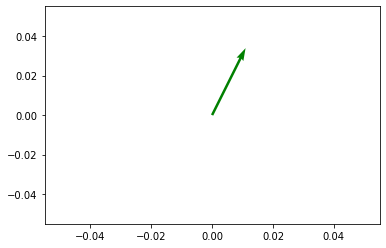

In [21]:
plt.quiver(
    0, 0, vector[0], vector[1], 
    color='green', scale=10); 

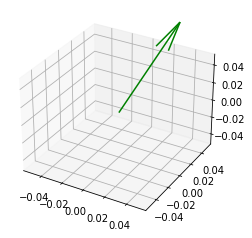

In [52]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.quiver(
    0, 0, 0, vector[0], vector[1], vector[2], 
    color='green', length=0.1, normalize=True); 

$\color{#003660}{\text{In Python}}$, we can use a distance to compute differences between more complex data.

$\color{#047C91}{\text{Example}}$: Load brain connectomes data from the package `geomstats`.

In [14]:
import geomstats.datasets.utils as ds

data, patient_ids, labels = ds.load_connectomes()

Given $N$ brain areas: a _brain connectome_ is a $N \times N$ table where a value at row $i$ and column $j$ quantifies whether areas $i$ and $j$ are generally activated together.

We show connectome using colors with `imshow`.

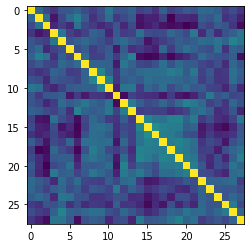

In [19]:
plt.imshow(data[0]);#print(data[0])

We verify that two schizophrenic subjects are "closer" than a schizophrenic subject and a healthy control.

In [25]:
print(labels[0:3])
healthy = data[0]; schiz1 = data[1]; schiz2 = data[2]
print(
    "healthy-schiz:", np.linalg.norm(healthy - schiz1))
print(
    "schiz-schiz: ", np.linalg.norm(schiz1 - schiz2))

[1 0 0]
healthy-schiz: 5.281496613975049
schiz-schiz:  4.461061135669169


### Nearest Neighbor

$\color{#EF5645}{\text{Definition}}$: Consider $z_1, . . . , z_m$ a list of $n$-vectors. We say that $z_j$ is the _nearest neighbor of the $n$-vector $x$_ if:
$$‖x − z_j ‖ ≤ ‖x − z_i ‖,$$
for all $i = 1, . . . , m$.

<center><img src="figs/03_nn.jpg" alt="default" width=300px/></center>

$\color{#047C91}{\text{Exercise}}$: Design an algorithm that can predict if a subject is schizophrenic or not, from its connectome.

### Example of inner-products in ECE


- Education: $p$ grades, $q$ weights; $p^T q$ is the total grade

- Deep Learning: 
  - each inner node is the result of an inner product
<center><img src="figs/01_nn.png" alt="default" width=310px/></center>

<center>Inner product in neural networks.</center>

$\color{#047C91}{\text{Exercise}}$: What are the components of the vector below? What is its dimension?

<center><img src="figs/01_def_vector.png" alt="default" width=800px/></center>

$\color{#EF5645}{\text{Definition}}$: In contrast to vectors, numbers are just called _scalars_. For example, 3.4 is a scalar.

$\color{#EF5645}{\text{Remark 2}}$: When you see "$a_i$":
- If $a$ is an n-vector:
  - $a_i$ is the entry at index $i$.
- If $[a_1, ..., a_m]$ is a list of $m$ $n$-vectors:
  - $a_i$ is the ith $n$-vector.